# FINDING FACES USING THE BASED IMAGE AT ./

ArcFace yield better result

/home/danhvuive/miniconda3/envs/main/lib/python3.12/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:118: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/danhvuive/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/danhvuive/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/danhvuive/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/danhvuive/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/danhvuive/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112]

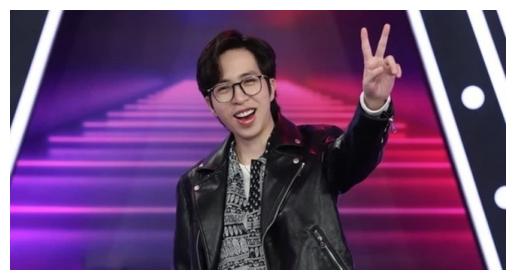

/home/danhvuive/miniconda3/envs/main/lib/python3.12/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


In [ ]:
import insightface
from insightface.app import FaceAnalysis
import torch
from facenet_pytorch import MTCNN
from joblib import Parallel, delayed
from PIL import Image
import numpy as np
from scipy.spatial.distance import cosine
import os
import matplotlib.pyplot as plt

mtcnn = MTCNN(keep_all=True)

app = FaceAnalysis()
app.prepare(ctx_id=0) 

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
images = []

workspace = '/mnt/nvme0n1p4/workspace/uni/sem8/hcmut-multidisciplinary-project/ai/faceId/'
images_folder = 'faces'
images_folder = os.path.join(workspace, images_folder)
# change your base image person to find their faces in the folder
# base_image = os.path.join('./', './phat-6.png')
base_image = os.path.join('./', './image.png')

for i in os.listdir(images_folder):
    image = Image.open(os.path.join(images_folder, i)).convert("RGB")
    images.append((image, os.path.join(images_folder, i)))

img2_ = Image.open(base_image)
img2_ = img2_.convert("RGB")
img2 = img2_

plt.imshow(img2)
plt.axis('off')  
plt.show()

img2_np = np.array(img2)

faces2 = mtcnn(img2_np)

# adjust threshold for how strict you want the similarity to be: ideal is 0.6 for clear faceID
threshold = 0.4
results = []

def jaccard_similarity(embedding1, embedding2):
    """
    Calculate the Jaccard similarity between two sets (binary embeddings).
    Convert the embeddings to binary (e.g., by thresholding).
    """
    bin_embedding1 = np.sign(embedding1)
    bin_embedding2 = np.sign(embedding2)
    
    intersection = np.sum(bin_embedding1 == bin_embedding2)
    union = np.sum(bin_embedding1 != 0) + np.sum(bin_embedding2 != 0) - intersection
    
    return intersection / union

def process_image(image, path, embeddings2, threshold, device):
    """
    Process each image, calculate embeddings and cosine similarity.
    """
    # print("HELOOOOO")
    faces = mtcnn(np.array(image))

    if faces is not None:
        image = np.array(image)
        embeddings1 = app.get(image)
        results = []



        for i, emb1 in enumerate(embeddings1):
            # for j, emb2 in enumerate(embeddings2_gpu):
            emb1_np = emb1.embedding.flatten()
            emb2_np = embeddings2.flatten()
            cosine_sim = 1 - cosine(emb1_np, emb2_np) 
            print(cosine_sim)
            
            if cosine_sim >= threshold:
                results.append((cosine_sim, path))

        return results
    else:
        return []

def compute_cosine_similarities(images, embeddings2, threshold, device):
    """
    Computes cosine similarities between faces in multiple images and embeddings2.
    Parallelizes the computation using joblib.
    """
    all_results = Parallel(n_jobs=-1)(
        delayed(process_image)(image, path, embeddings2, threshold, device)
        for image, path in images
    )

    return [result for sublist in all_results for result in sublist]

if faces2 is not None:
    embeddings2 = app.get(img2_np)[0].embedding
    results = []


    all_results = compute_cosine_similarities(images, embeddings2, threshold, device)

    results.extend(all_results)
else:
    print("No faces detected in one or both of the images.")


VGG2 FACENET


In [39]:
# from facenet_pytorch import MTCNN, InceptionResnetV1
# import torch
# from joblib import Parallel, delayed
# from PIL import Image
# import numpy as np
# from scipy.spatial.distance import cosine
# import os
# import matplotlib.pyplot as plt
# import torchvision.models as models
# mtcnn = MTCNN(keep_all=True)
# model = InceptionResnetV1(pretrained='vggface2').eval()
# #model = models.resnet50(pretrained=True)
# #model.eval()

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# images=[]

# #replace with your own path
# workspace = '/mnt/nvme0n1p4/workspace/uni/sem8/hcmut-multidisciplinary-project/ai/faceId/'
# images_folder = 'faces'
# images_folder = os.path.join(workspace,images_folder)
# base_image = os.path.join('./','./phat-6.png')
# for i in os.listdir(images_folder):
#   image = Image.open(os.path.join(images_folder,i)).convert("RGB")
#   images.append((image,os.path.join(images_folder,i)))
# img2_ = Image.open(base_image)

# img2_ = img2_.convert("RGB")
# #img2 = img2_.rotate(30)
# img2 = img2_
# plt.imshow(img2)
# plt.axis('off')  
# plt.show()

# faces2 = mtcnn(np.array(img2))
# threshold = 0.6
# results = []
# def jaccard_similarity(embedding1, embedding2):
#     """
#     Calculate the Jaccard similarity between two sets (binary embeddings).
#     Convert the embeddings to binary (e.g., by thresholding).
#     """
#     # Convert the embeddings to binary (sign of embeddings)
#     bin_embedding1 = np.sign(embedding1)
#     bin_embedding2 = np.sign(embedding2)
    
#     # Compute intersection and union
#     intersection = np.sum(bin_embedding1 == bin_embedding2)
#     union = np.sum(bin_embedding1 != 0) + np.sum(bin_embedding2 != 0) - intersection
    
#     return intersection / union
# def process_image(image, path, embeddings2, threshold, device):
#     """
#     Process each image, calculate embeddings and cosine similarity.
#     """
#     faces = mtcnn(np.array(image))

#     if faces is not None:
#         embeddings1 = model(faces).to(device)
#         results = []

#         embeddings2_gpu = embeddings2.to(device)

#         for i, emb1 in enumerate(embeddings1):
#             for j, emb2 in enumerate(embeddings2_gpu):
#                 emb1_np = emb1.detach().cpu().numpy()
#                 emb2_np = emb2.detach().cpu().numpy()

#                 cosine_sim = 1 - cosine(emb1_np.flatten(), emb2_np.flatten())
#                 print(cosine_sim)
#                 if cosine_sim >= threshold:
#                     results.append((cosine_sim, path))

#         return results
#     else:
#         return []

# def compute_cosine_similarities(images, embeddings2, threshold, device):
#     """
#     Computes cosine similarities between faces in multiple images and embeddings2.
#     Parallelizes the computation using joblib.
#     """
#     all_results = Parallel(n_jobs=-1)(
#         delayed(process_image)(image, path, embeddings2, threshold, device)
#         for image, path in images
#     )

#     return [result for sublist in all_results for result in sublist]

# if faces2 is not None:
#     embeddings2 = model(faces2).to(device)
#     results = []

#     all_results = compute_cosine_similarities(images, embeddings2, threshold, device)

#     results.extend(all_results)
# else:
#     print("No faces detected in one or both of the images.")

In [4]:
import torch
torch.version.cuda

'12.8'

# RESULT OF FACES DETECTED

0.6676319560634063


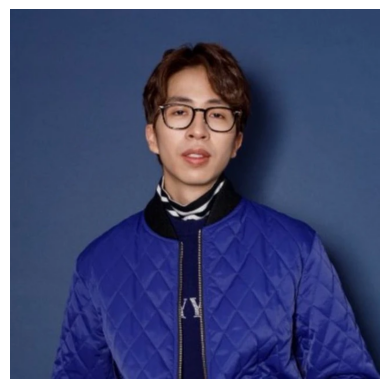

0.6819118349450876


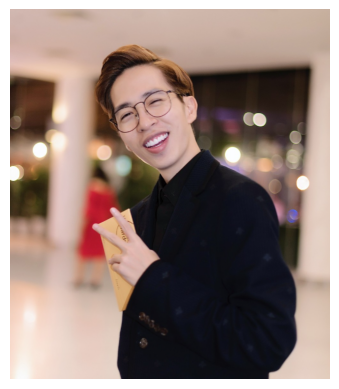

0.5329829097011461


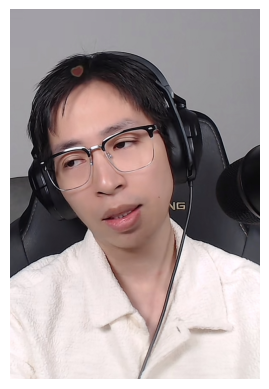

0.7114370958687489


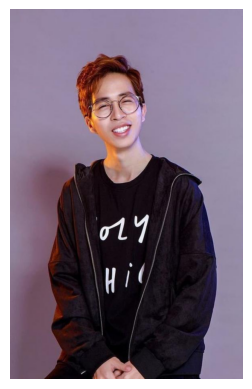

In [7]:

import matplotlib.pyplot as plt

for i in results:
  print(i[0])
  image = Image.open(i[1])
  plt.imshow(image)
  plt.axis('off')
  plt.show()